# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&units=metric&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | jaragua
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | tempio pausania
Processing Record 8 of Set 1 | yamada
Processing Record 9 of Set 1 | itoman
Processing Record 10 of Set 1 | cartagena
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | pangai
Processing Record 13 of Set 1 | la passe
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kalmunai
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | mahibadhoo
Processing Record 18 of Set 1 | ulsteinvik
Processing Record 19 of Set 1 | weno
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | hede
Processing Record 22 of Set 1 | bengkulu
Processing Record 23 o

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.38,98,100,0.97,GS,1730946100
1,lebu,-37.6167,-73.6500,10.50,78,99,5.85,CL,1730946101
2,margaret river,-33.9500,115.0667,15.33,58,85,5.31,AU,1730945964
3,jaragua,-15.7569,-49.3344,21.16,96,100,0.94,BR,1730946104
4,portland,45.5234,-122.6762,11.91,74,0,2.68,US,1730945960


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.38,98,100,0.97,GS,1730946100
1,lebu,-37.6167,-73.6500,10.50,78,99,5.85,CL,1730946101
2,margaret river,-33.9500,115.0667,15.33,58,85,5.31,AU,1730945964
3,jaragua,-15.7569,-49.3344,21.16,96,100,0.94,BR,1730946104
4,portland,45.5234,-122.6762,11.91,74,0,2.68,US,1730945960


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

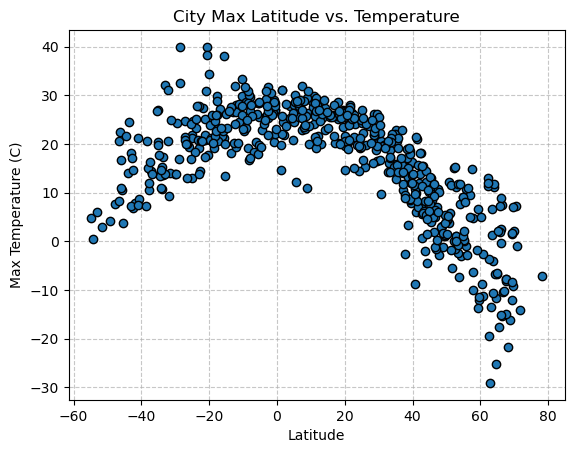

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Max Latitude vs. Temperature") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

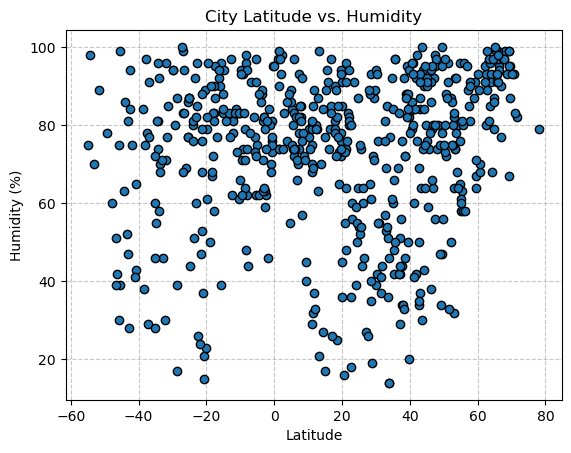

In [22]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Humidity") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

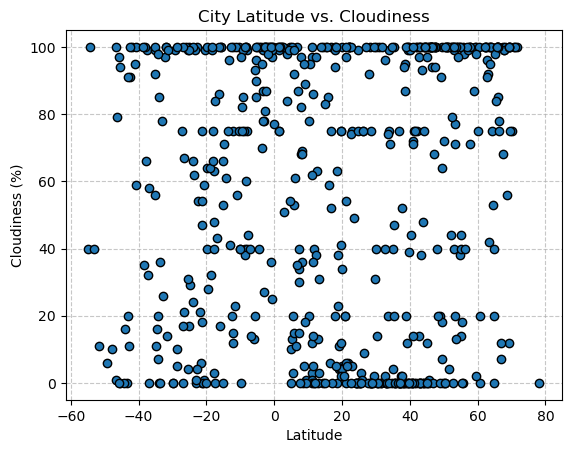

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

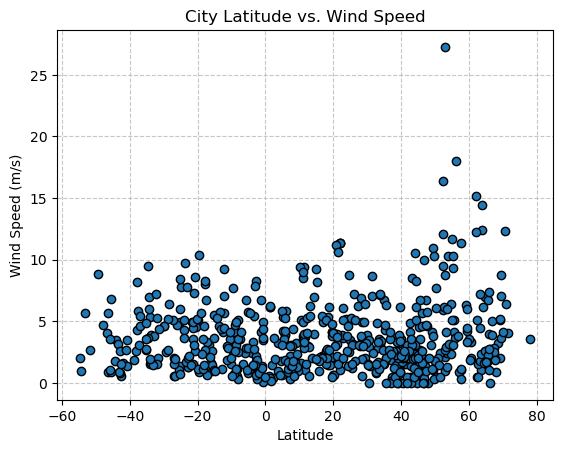

In [24]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values, edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(linestyle='--', alpha=0.7) 
plt.gca().set_axisbelow(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def create_linear_regression(x, y, x_titles, y_titles):
        # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
  

    print("r-value  : ", r_value, "\np-value  : ", p_value, "\nstd-error: ", std_err)

    regress_values = x * slope + intercept
    #print(regress_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)

# Create Plot
    plt.scatter(x,y, edgecolors='black')
    plt.title(f"{x_titles} vs. {y_titles}") 
    plt.plot(x,regress_values,"r-")

# Label plot and annotate the line equation
    plt.xlabel(x_titles)
    plt.ylabel(y_titles)
    plt.grid(linestyle='--', alpha=0.7) 
    plt.gca().set_axisbelow(True)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,portland,45.5234,-122.6762,11.91,74,0,2.68,US,1730945960
5,iqaluit,63.7506,-68.5145,-4.15,85,100,1.03,CA,1730946106
6,tempio pausania,40.8974,9.1035,9.85,96,72,1.52,IT,1730946107
7,yamada,39.4667,141.9500,7.82,50,99,3.27,JP,1730946108
8,itoman,26.1247,127.6694,24.01,60,75,7.20,JP,1730946109


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.38,98,100,0.97,GS,1730946100
1,lebu,-37.6167,-73.6500,10.50,78,99,5.85,CL,1730946101
2,margaret river,-33.9500,115.0667,15.33,58,85,5.31,AU,1730945964
3,jaragua,-15.7569,-49.3344,21.16,96,100,0.94,BR,1730946104
10,tsiombe,-25.3000,45.4833,21.20,86,99,1.34,MG,1730946112


###  Temperature vs. Latitude Linear Regression Plot

r-value  :  -0.8603017681190219 
p-value  :  9.241606358160042e-117 
std-error:  0.01622966301835282
y = -0.54x + 32.74


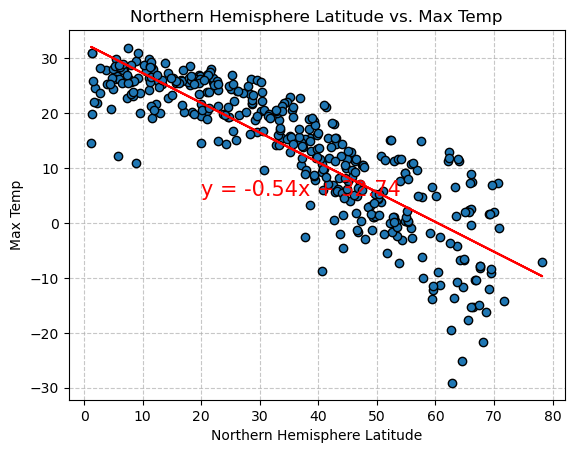

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Max Temp' )

r-value  :  0.6519185226003562 
p-value  :  7.427246928947255e-25 
std-error:  0.028195541833594195
y = 0.34x + 28.73


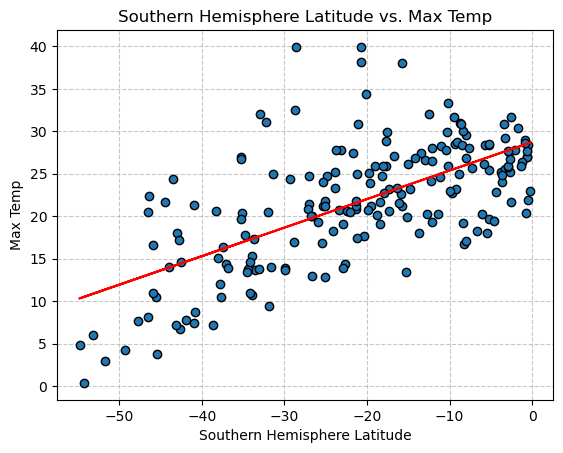

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Max Temp')

**Discussion about the linear relationship:** 
Here we see that there is a correlation between distance from the equator and temperature. The further we get from the equator we see a decrease in temperature for both the Northen and Souther Hemispheres. We can also see that the northern hemisphere has fewer point of outliers, the grouping of temperatures is much closer to the regression line. The southern hemisphere does show more outliers and its data points are much more spread out in comparison to its regression line.

### Humidity vs. Latitude Linear Regression Plot

r-value  :  0.19914064401294462 
p-value  :  6.885572349668818e-05 
std-error:  0.05182686296036155
y = 0.21x + 66.36


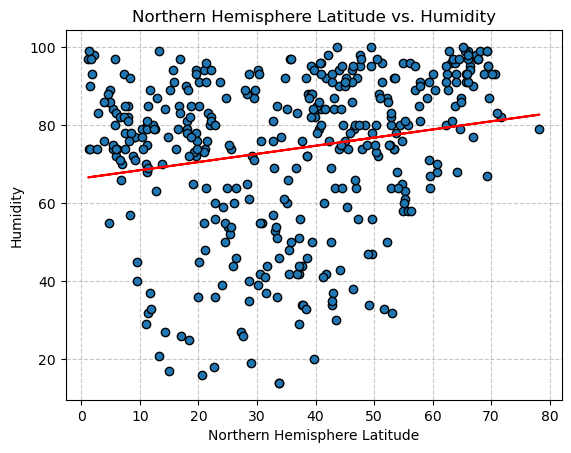

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Humidity')

r-value  :  0.2035048773708448 
p-value  :  0.004426934842855687 
std-error:  0.09555594618622573
y = 0.28x + 78.66


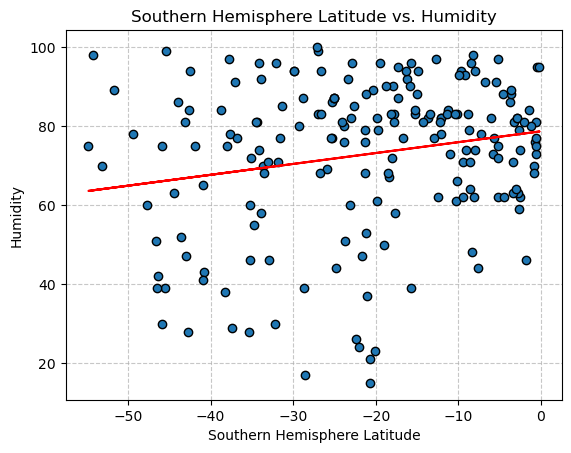

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-value  :  0.20934416369543288 
p-value  :  2.806025622679172e-05 
std-error:  0.10816952721920238
y = 0.46x + 37.3


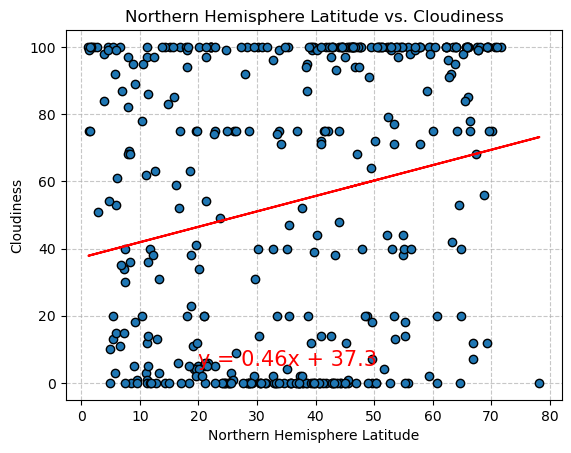

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Cloudiness')

r-value  :  0.2569776960973408 
p-value  :  0.00029793479832462876 
std-error:  0.1842316340372899
y = 0.68x + 74.3


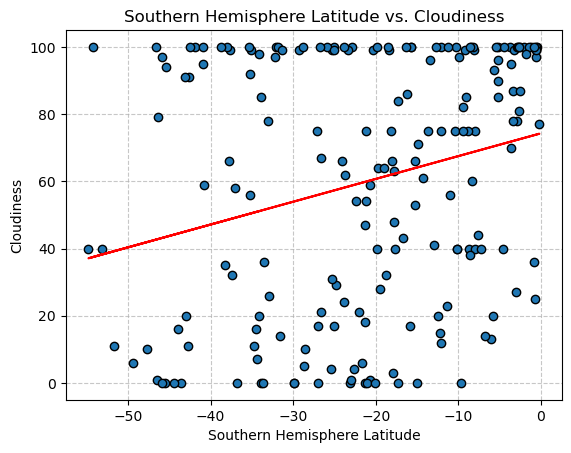

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-value  :  0.13846153438825476 
p-value  :  0.00590658615304774 
std-error:  0.008168722337381468
y = 0.02x + 2.86


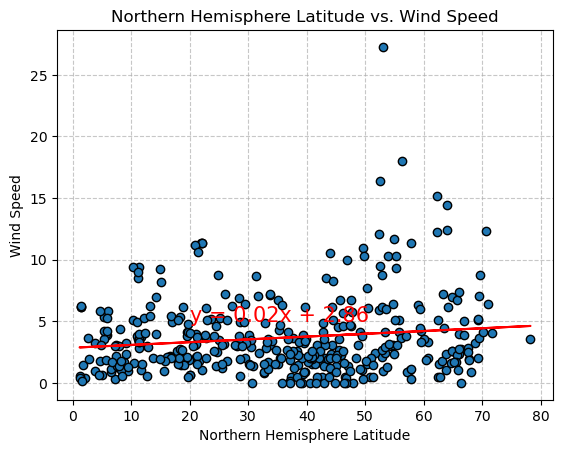

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Northern Hemisphere Latitude', 'Wind Speed')

r-value  :  -0.08304420129882546 
p-value  :  0.2496555159002915 
std-error:  0.011710177515776021
y = -0.01x + 3.17


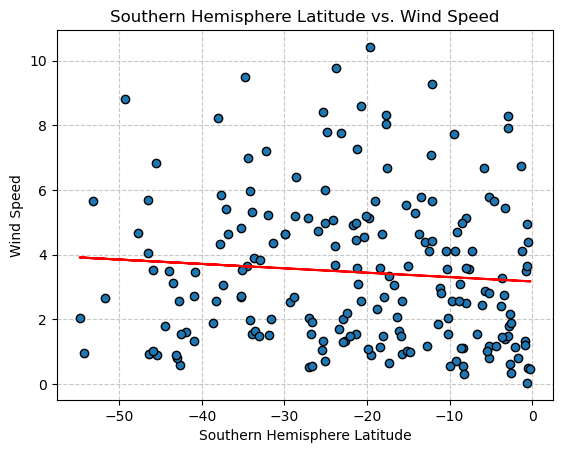

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

create_linear_regression(x_values, y_values, 'Southern Hemisphere Latitude','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE